In [2]:
import numpy as np
import pandas as pd
start = pd.Timestamp("2014-11-01")
end = pd.Timestamp("2014-11-02")
N = 100000
t = np.random.randint(start.value, end.value, N)
t -= t % 1000000000

start = pd.to_datetime(np.array(t, dtype="datetime64[ns]"))
duration = pd.to_timedelta(np.random.randint(100, 1000, N), unit="s")
df = pd.DataFrame({"start":start, "duration":duration})
df["end"] = df.start + df.duration

print (df.head(5))

                start duration                 end
0 2014-11-01 17:17:44 00:06:07 2014-11-01 17:23:51
1 2014-11-01 10:54:49 00:16:28 2014-11-01 11:11:17
2 2014-11-01 21:37:02 00:08:16 2014-11-01 21:45:18
3 2014-11-01 22:18:40 00:05:38 2014-11-01 22:24:18
4 2014-11-01 05:54:36 00:05:04 2014-11-01 05:59:40


In [3]:
enter_count = df.start.value_counts()
exit_count = df.end.value_counts()
df2 = pd.concat([enter_count, exit_count], axis=1, keys=["enter", "exit"])
df2.fillna(0, inplace=True)
print (df2.head(5))

                     enter  exit
2014-11-01 00:00:01    2.0   0.0
2014-11-01 00:00:02    1.0   0.0
2014-11-01 00:00:03    1.0   0.0
2014-11-01 00:00:04    3.0   0.0
2014-11-01 00:00:05    1.0   0.0


<ipython-input-4-28e455282d47>:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  counts = df2["diff"].resample("5min", how="sum").fillna(0).cumsum()


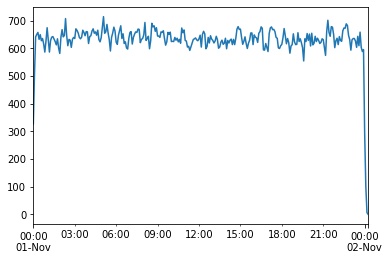

In [4]:
df2["diff"] = df2["enter"] - df2["exit"]
counts = df2["diff"].resample("5min", how="sum").fillna(0).cumsum()
counts.plot()